<a href="https://colab.research.google.com/github/dnzambuli/Deep-learning-4-CV/blob/master/Week_3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# building and training a model for image classification

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

## Loading and preprocessing the data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


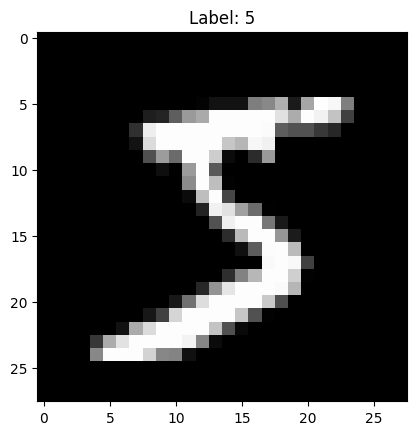

In [ ]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Normalize pixel values (0 to 1)
train_images = train_images / 255.0
test_images = test_images / 255.0
# Add a channel dimension (grayscale image has 1 channel)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
# Display a sample image
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

## Build the CNN model

In [ ]:
# Create CNN model
model = models.Sequential([ layers.Conv2D(32, (3, 3),
                                          activation='relu',
                                          input_shape=(28, 28, 1)),
                            layers.MaxPooling2D((2, 2)),
                            layers.Conv2D(64, (3, 3), activation='relu'),
                            layers.MaxPooling2D((2, 2)),
                            layers.Flatten(),
                            layers.Dense(64, activation='relu'),layers.Dropout(0.5), # Regularization
                            layers.Dense(10, activation='softmax') # 10 classes for digits 0–9
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

### Definition of parameters

1. Dropout -- how many layers are going to be turned of during training

> Add blockquote

## Train the Model

In [ ]:
# Train the model
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_split=0.2, # Use 20% of training data for validation
                    batch_size=64)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7656 - loss: 0.7173 - val_accuracy: 0.9749 - val_loss: 0.0856
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9518 - loss: 0.1649 - val_accuracy: 0.9831 - val_loss: 0.0575
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9653 - loss: 0.1178 - val_accuracy: 0.9848 - val_loss: 0.0536
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9710 - loss: 0.0953 - val_accuracy: 0.9876 - val_loss: 0.0449
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9776 - loss: 0.0768 - val_accuracy: 0.9880 - val_loss: 0.0438
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9806 - loss: 0.0652 - val_accuracy: 0.9894 - val_loss: 0.0383
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9838 - loss: 0.0551 - val_accuracy: 0.9896 - val_loss: 0.0416
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9850 - loss: 0.0488 - val_accuracy: 0.

## Evaluate the Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9910 - loss: 0.0276
Test Accuracy: 99.29%


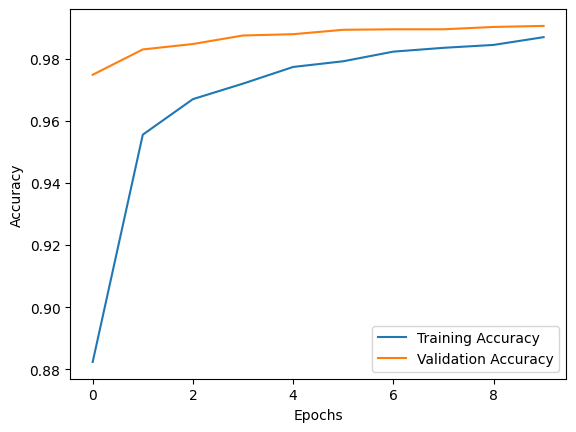

In [ ]:
# Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(test_images,
                                          test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Save and Load the Model

In [ ]:
# Save the model
model.save('mnist_cnn_model.h5')
print("Model saved as mnist_cnn_model.h5")
# Load the model
loaded_model = tf.keras.models.load_model('mnist_cnn_model.h5')

Model saved as mnist_cnn_model.h5


## Test predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


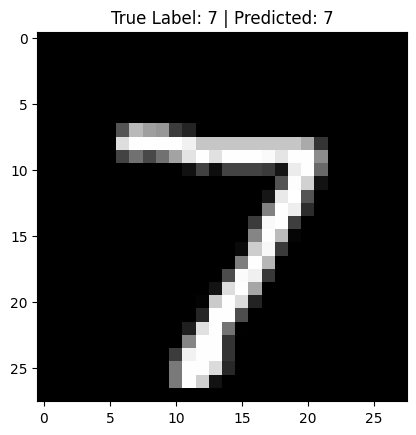

In [ ]:
# model prediction
import numpy as np
predictions = loaded_model.predict(test_images)
# Display a test image and predicted label
index = 0 # Change this to view other test images
plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {test_labels[index]} | Predicted: {np.argmax(predictions[index])}")
plt.show()
